Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(60000, 785)

In [6]:
test.shape

(10000, 785)

In [7]:
training = np.array(train,dtype= 'float32')

In [8]:
testing = np.array(test, dtype= 'float32')

8.0

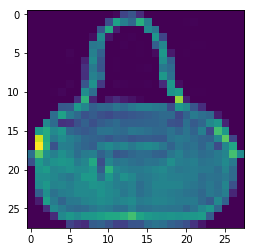

In [9]:
plt.imshow(training[20,1:].reshape(28, 28))
label = training[20,0]
label

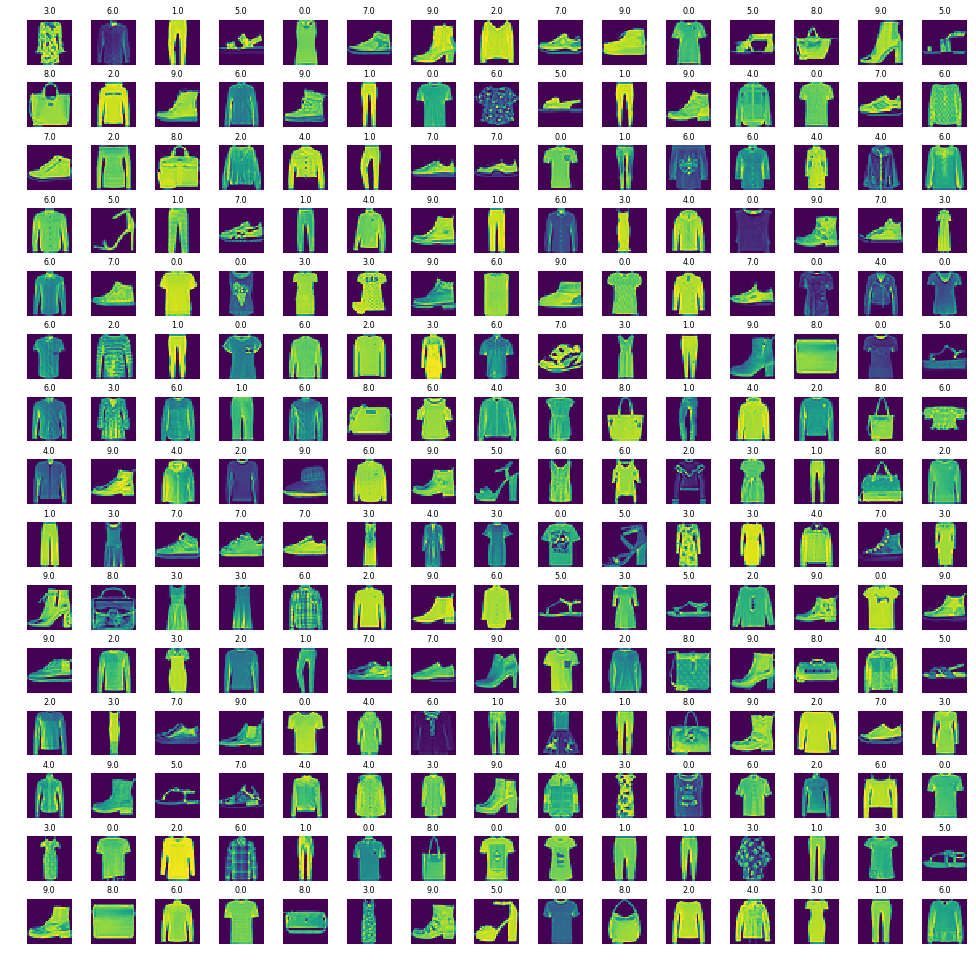

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid, figsize=(17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    

Training the model

In [11]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [12]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size=0.2, random_state=12345)

In [15]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
import keras

Using TensorFlow backend.


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
cnn_model = Sequential()

In [20]:
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation= 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\bpava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [21]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
cnn_model.add(Flatten())

In [23]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

C:\Users\bpava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [24]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\bpava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [25]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [26]:
cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch=50,verbose=1,validation_data=(X_validate,y_validate))

Instructions for updating:
Use tf.cast instead.


C:\Users\bpava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.9696 - acc: 0.6350 - val_loss: 0.5051 - val_acc: 0.8205
Epoch 2/50
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4658 - acc: 0.8344 - val_loss: 0.4245 - val_acc: 0.8526
Epoch 3/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.4120 - acc: 0.8554 - val_loss: 0.3931 - val_acc: 0.8616
Epoch 4/50
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3798 - acc: 0.8672 - val_loss: 0.3627 - val_acc: 0.8737
Epoch 5/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3568 - acc: 0.8751 - val_loss: 0.3674 - val_acc: 0.8694
Epoch 6/50
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3394 - acc: 0.8813 - val_loss: 0.3397 - val_acc: 0.8799
Epoch 7/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.3289 - acc: 0.8854 - val_loss: 0.3293 - val_acc

Evauating the model

In [27]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test accuracy {:.3f}".format(evaluation[1]))

10000/10000 [==============================] - 3s 310us/step
Test accuracy 0.910


In [28]:
predicted_classes = cnn_model.predict_classes(X_test)

In [29]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

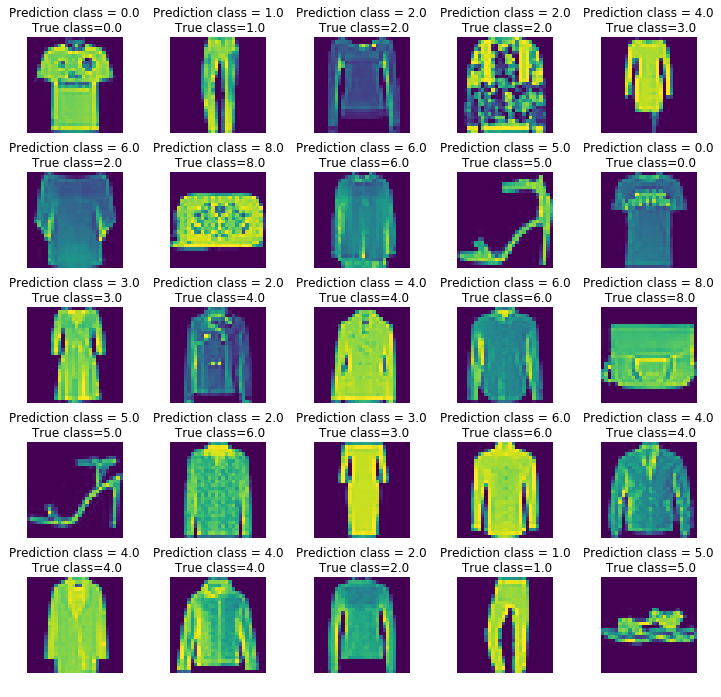

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title("Prediction class = {:0.1f}\n True class={:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

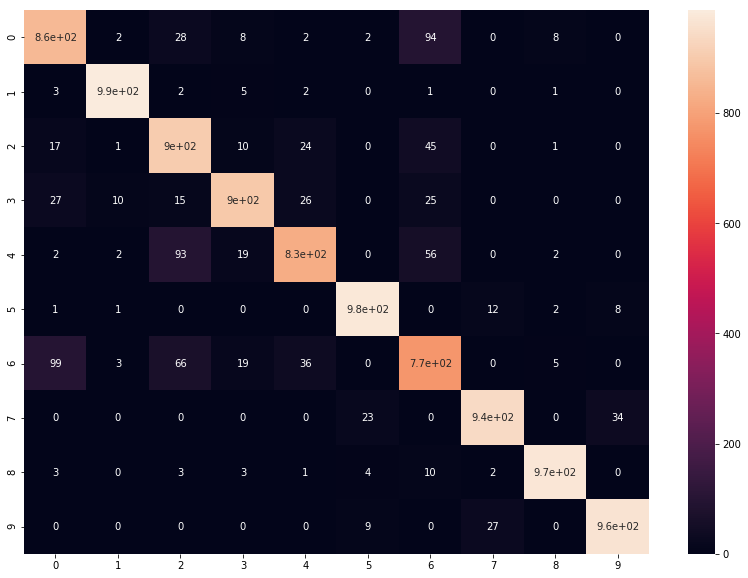

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [32]:
from sklearn.metrics import classification_report
num_classes=10
target_names = ["Class{}" .format(i) for i in range (num_classes)]
print(classification_report(y_test,predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

      Class0       0.85      0.86      0.85      1000
      Class1       0.98      0.99      0.98      1000
      Class2       0.81      0.90      0.86      1000
      Class3       0.93      0.90      0.91      1000
      Class4       0.90      0.83      0.86      1000
      Class5       0.96      0.98      0.97      1000
      Class6       0.77      0.77      0.77      1000
      Class7       0.96      0.94      0.95      1000
      Class8       0.98      0.97      0.98      1000
      Class9       0.96      0.96      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

